In [ ]:
!pip install yfinance pandas matplotlib seaborn


In [ ]:
import yfinance as yf
import pandas as pd

tickers = ["RELIANCE.NS", "INFY.NS"]
df = yf.download(tickers, start="2022-01-01", end="2025-06-13")

# Show column structure (multi-index)
print("Column MultiIndex levels:")
print(df.columns.levels)

# Peek at the first few rows
df.head()


[*********************100%***********************]  2 of 2 completed

Column MultiIndex levels:
[['Close', 'High', 'Low', 'Open', 'Volume'], ['INFY.NS', 'RELIANCE.NS']]


Price             Close                      High                       Low  \
Ticker          INFY.NS  RELIANCE.NS      INFY.NS  RELIANCE.NS      INFY.NS   
Date                                                                          
2022-01-03  1755.068604  1098.149048  1769.490496  1100.022110  1745.176771   
2022-01-04  1755.715576  1122.932129  1762.649134  1124.256963  1736.162920   
2022-01-05  1705.331665  1128.185547  1759.182297  1131.566145  1701.032837   
2022-01-06  1680.509644  1103.927979  1689.939237  1121.059107  1664.053954   
2022-01-07  1677.274048  1112.836182  1697.335098  1122.909222  1670.340489   

Price                           Open                Volume              
Ticker      RELIANCE.NS      INFY.NS  RELIANCE.NS  INFY.NS RELIANCE.NS  
Date                                                                    
2022-01-03  1079.738882  1745.176771  1080.401299  3329616     5421611  
2022-01-04  1098.217641  1755.068376  1103.654004  3921999    10847728  
2022-01-05  1111.442782  1756.501299  1124.713718  6995719    11643813  
2022-01-06  1100.501704  1689.939237  1119.779949  6449205    14447422  
2022-01-07  1101.666685  1678.337103  1110.529201  4834389    13112115

In [ ]:
# Extract just 'Close' prices from multi-index
close_prices = df['Close'].copy()

# Check structure
print(close_prices.head())


Ticker          INFY.NS  RELIANCE.NS
Date                                
2022-01-03  1755.068604  1098.149048
2022-01-04  1755.715576  1122.932129
2022-01-05  1705.331665  1128.185547
2022-01-06  1680.509644  1103.927979
2022-01-07  1677.274048  1112.836182


In [ ]:
# Reset index and melt to long format
close_prices = close_prices.reset_index().melt(
    id_vars="Date",
    var_name="Ticker",
    value_name="Close"
)

close_prices.head()


,Date,Ticker,Close
0,2022-01-03,INFY.NS,1755.068604
1,2022-01-04,INFY.NS,1755.715576
2,2022-01-05,INFY.NS,1705.331665
3,2022-01-06,INFY.NS,1680.509644
4,2022-01-07,INFY.NS,1677.274048


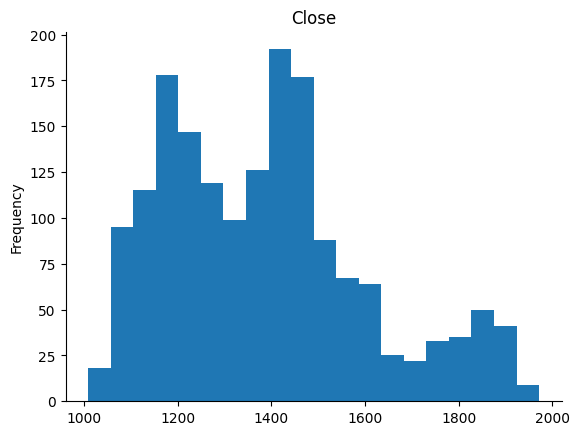

In [ ]:
# @title Close

from matplotlib import pyplot as plt
close_prices['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

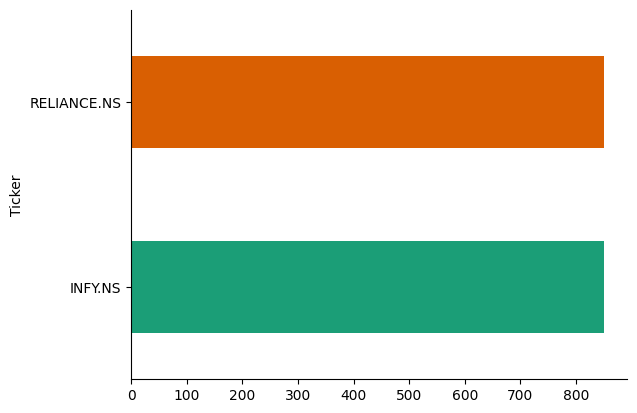

In [ ]:
# @title Ticker

from matplotlib import pyplot as plt
import seaborn as sns
close_prices.groupby('Ticker').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

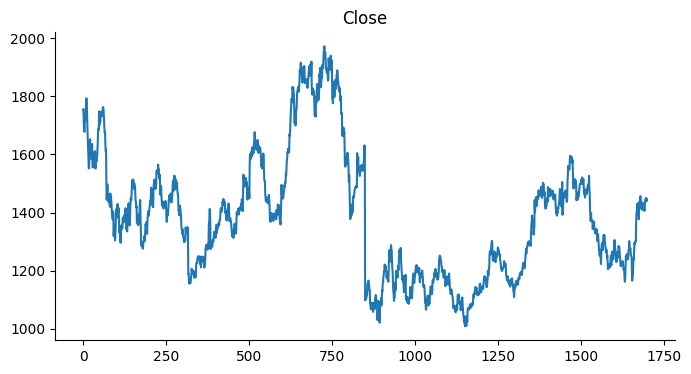

In [ ]:
# @title Close

from matplotlib import pyplot as plt
close_prices['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

<ipython-input-20-1788421709>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(close_prices, x='Close', y='Ticker', inner='box', palette='Dark2')


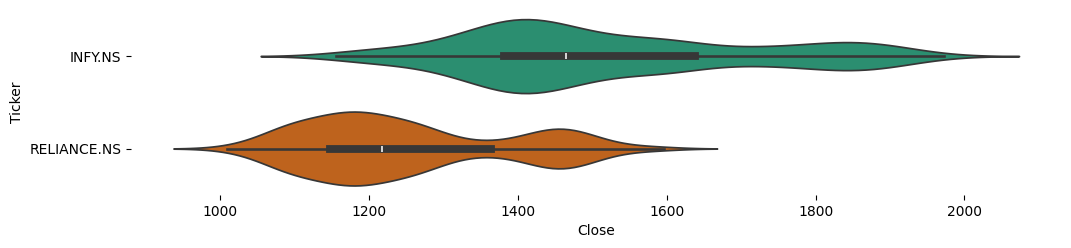

In [ ]:
# @title Ticker vs Close

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(close_prices['Ticker'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(close_prices, x='Close', y='Ticker', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

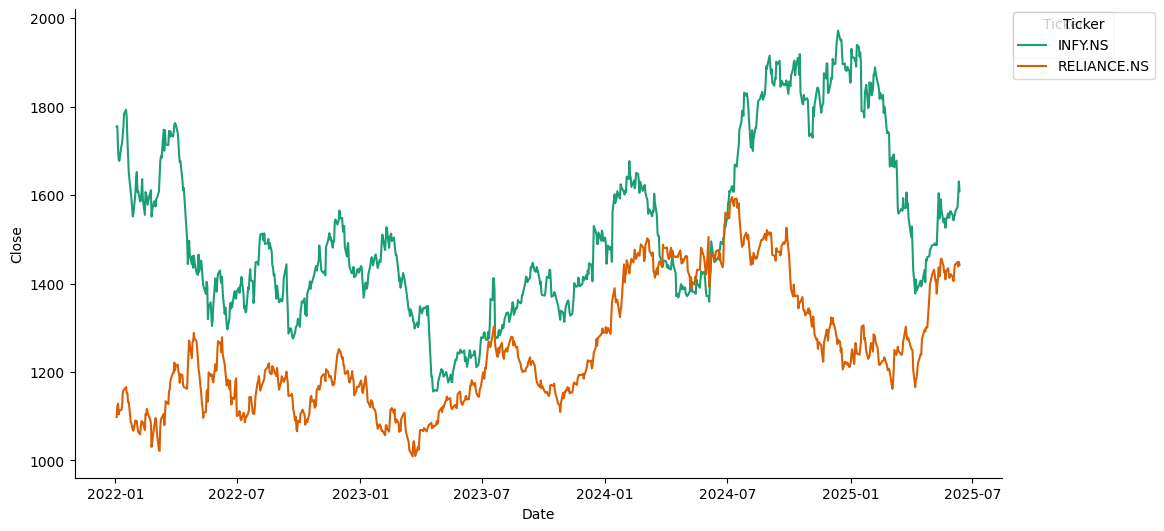

In [ ]:
# @title Date vs Close

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Close']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = close_prices.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Ticker')):
  _plot_series(series, series_name, i)
  fig.legend(title='Ticker', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Close')

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=close_prices)

https://docs.google.com/spreadsheets/d/1TAHz8f27q9D71VPXLROd9OCduzPyNX7mpQGZvC8Jat0/edit#gid=0


In [ ]:
# Check data types and nulls
print(close_prices.info())

# Basic stats
print(close_prices.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1700 non-null   datetime64[ns]
 1   Ticker  1700 non-null   object        
 2   Close   1700 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 40.0+ KB
None
                      Date        Close
count                 1700  1700.000000
mean   2023-09-21 14:52:48  1385.946641
min    2022-01-03 00:00:00  1008.876465
25%    2022-11-11 00:00:00  1206.903290
50%    2023-09-19 00:00:00  1377.518677
75%    2024-08-05 00:00:00  1493.518738
max    2025-06-12 00:00:00  1971.954346
std                    NaN   215.883272


In [ ]:
# Count missing values
missing = close_prices.isnull().sum()
print("Missing values:\n", missing)

# Optional: Remove or interpolate
close_prices.dropna(inplace=True)


Missing values:
 Date      0
Ticker    0
Close     0
dtype: int64


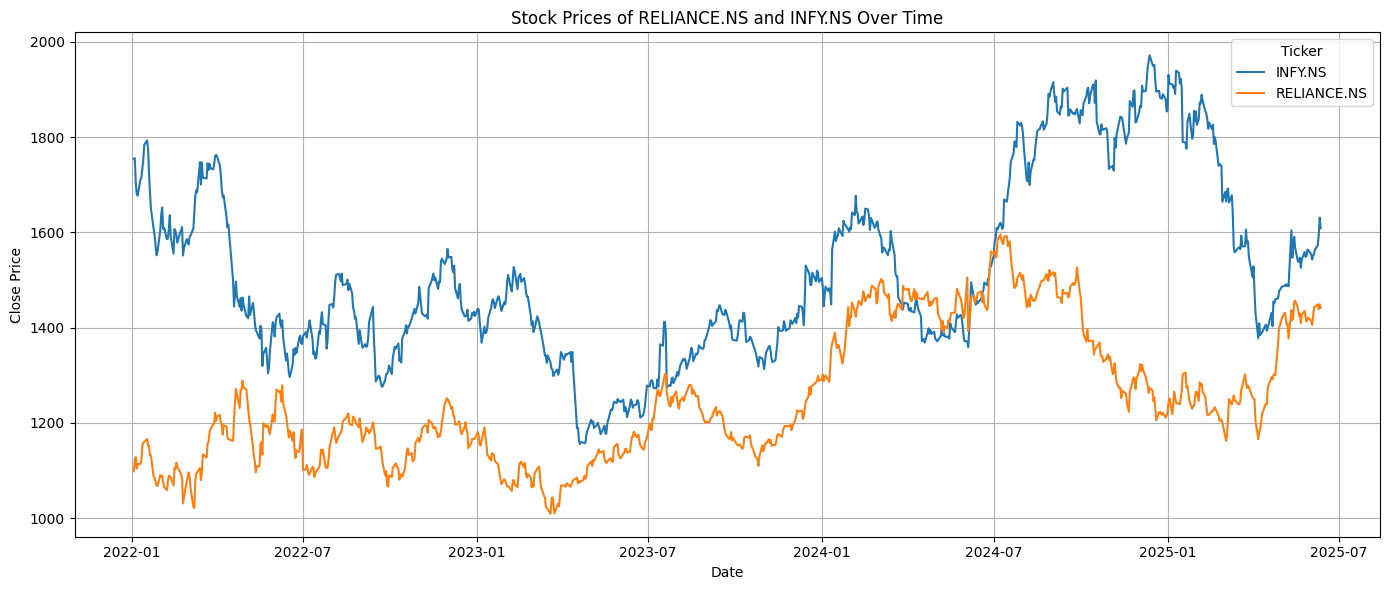

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.lineplot(data=close_prices, x='Date', y='Close', hue='Ticker')
plt.title("Stock Prices of RELIANCE.NS and INFY.NS Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.tight_layout()
plt.show()


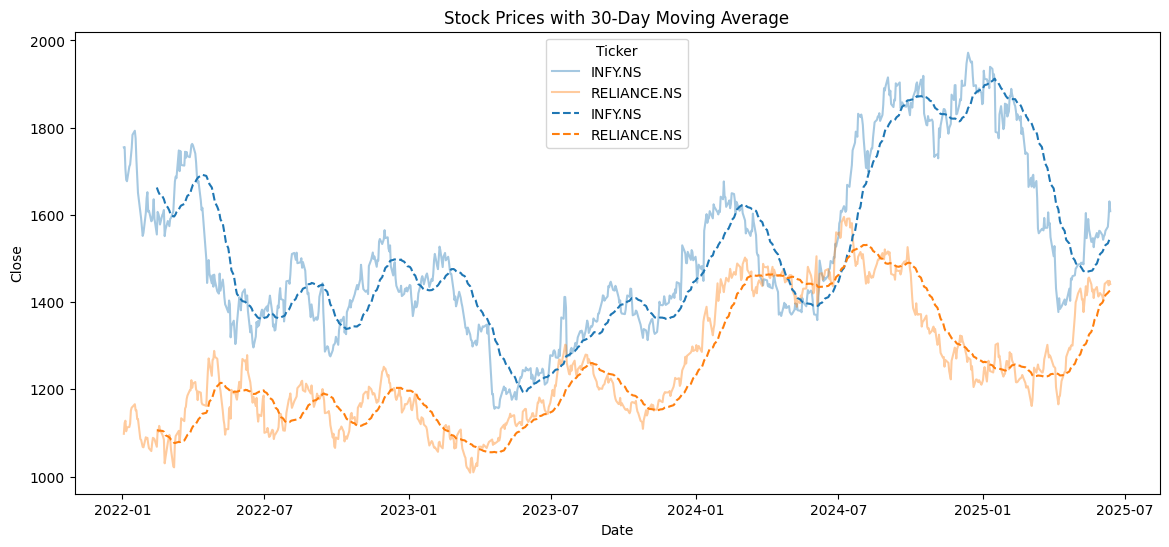

In [ ]:
# Add 30-day moving average
ma_df = close_prices.copy()
ma_df['MA30'] = ma_df.groupby('Ticker')['Close'].transform(lambda x: x.rolling(30).mean())

plt.figure(figsize=(14, 6))
sns.lineplot(data=ma_df, x='Date', y='Close', hue='Ticker', alpha=0.4)
sns.lineplot(data=ma_df, x='Date', y='MA30', hue='Ticker', linestyle='--')
plt.title("Stock Prices with 30-Day Moving Average")
plt.show()

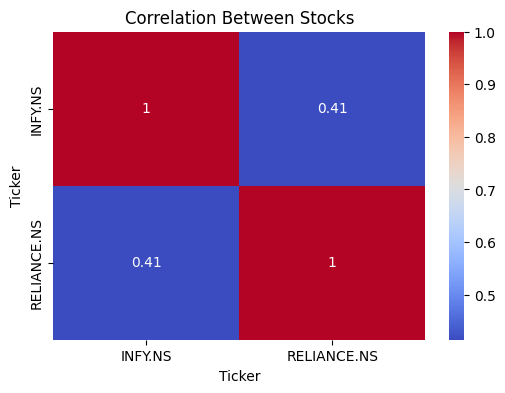

In [ ]:
# Pivot to wide format for correlation
pivot_df = close_prices.pivot(index='Date', columns='Ticker', values='Close')

# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(pivot_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Stocks")
plt.show()


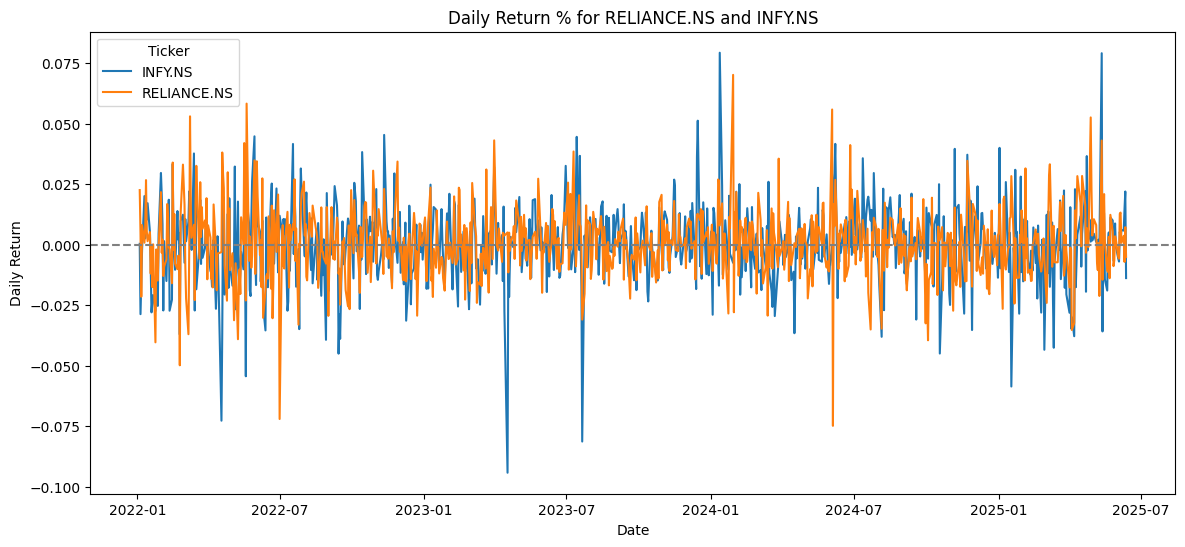

In [ ]:
returns_df = close_prices.copy()
returns_df['Daily_Return'] = returns_df.groupby('Ticker')['Close'].pct_change()

plt.figure(figsize=(14, 6))
sns.lineplot(data=returns_df, x='Date', y='Daily_Return', hue='Ticker')
plt.title("Daily Return % for RELIANCE.NS and INFY.NS")
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel("Daily Return")
plt.show()


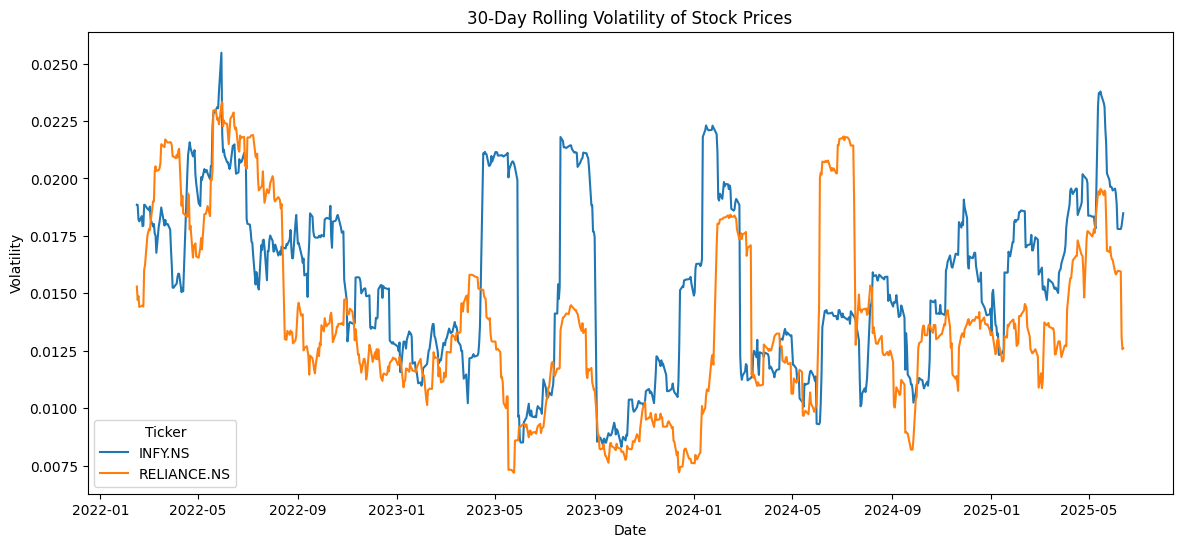

In [ ]:
# 30-day rolling volatility
volatility_df = close_prices.copy()
volatility_df['Volatility'] = volatility_df.groupby('Ticker')['Close'].transform(lambda x: x.pct_change().rolling(30).std())

plt.figure(figsize=(14, 6))
sns.lineplot(data=volatility_df, x='Date', y='Volatility', hue='Ticker')
plt.title("30-Day Rolling Volatility of Stock Prices")
plt.show()


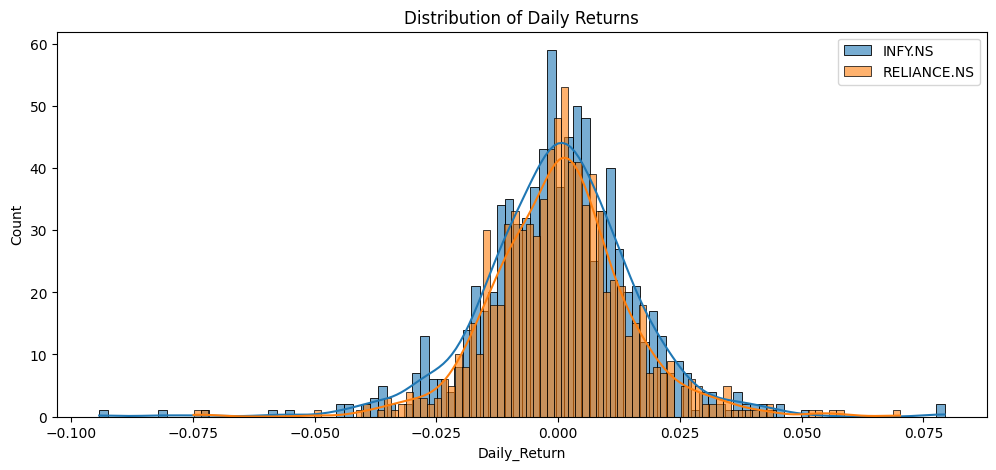

In [ ]:
plt.figure(figsize=(12, 5))
for ticker in close_prices['Ticker'].unique():
    sns.histplot(
        data=returns_df[returns_df['Ticker'] == ticker],
        x='Daily_Return', kde=True, bins=100,
        label=ticker, alpha=0.6
    )
plt.title("Distribution of Daily Returns")
plt.legend()
plt.show()


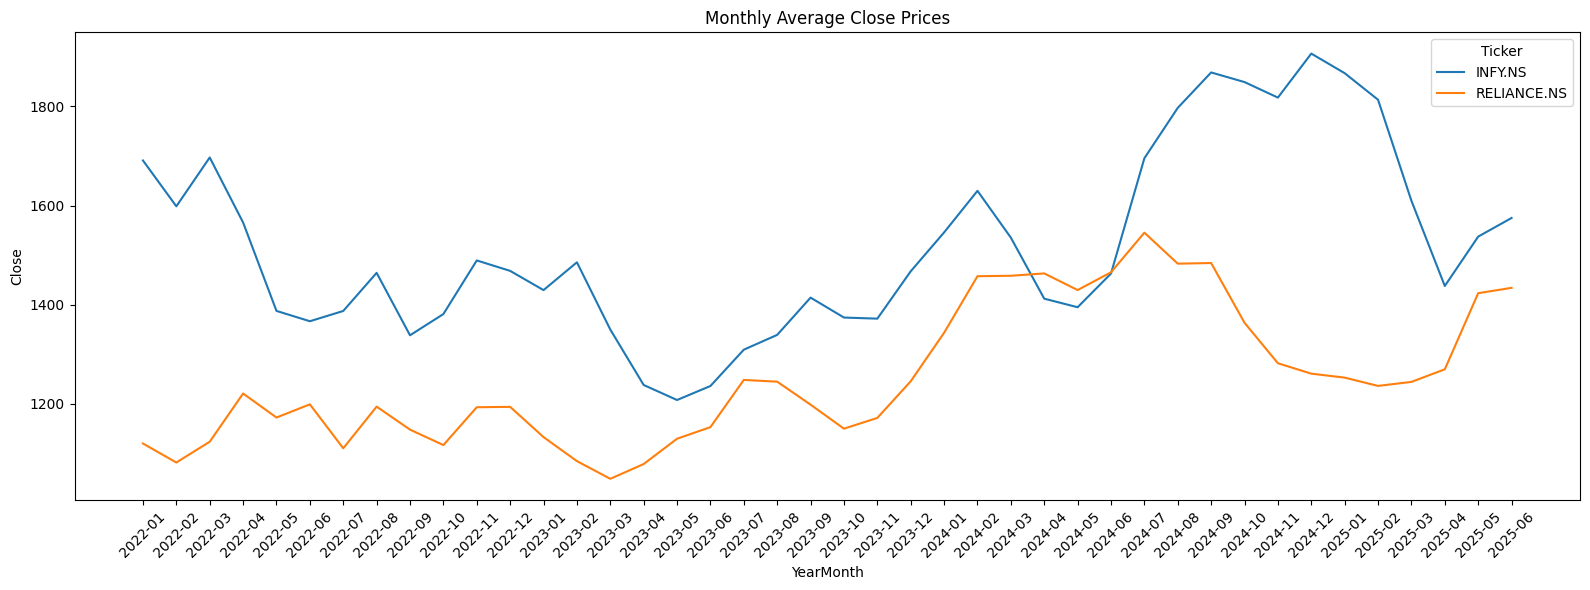

In [ ]:
# Extract month and year
monthly_df = close_prices.copy()
monthly_df['YearMonth'] = pd.to_datetime(monthly_df['Date']).dt.to_period('M')
monthly_avg = monthly_df.groupby(['YearMonth', 'Ticker'])['Close'].mean().reset_index()

# Convert 'YearMonth' to string for plotting
monthly_avg['YearMonth'] = monthly_avg['YearMonth'].astype(str)

plt.figure(figsize=(16, 6))
sns.lineplot(data=monthly_avg, x='YearMonth', y='Close', hue='Ticker')
plt.title("Monthly Average Close Prices")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
for ticker in close_prices['Ticker'].unique():
    subset = close_prices[close_prices['Ticker'] == ticker]
    max_day = subset.loc[subset['Close'].idxmax()]
    min_day = subset.loc[subset['Close'].idxmin()]
    print(f"\n📈 {ticker} Max Price: ₹{max_day['Close']:.2f} on {max_day['Date']}")
    print(f"📉 {ticker} Min Price: ₹{min_day['Close']:.2f} on {min_day['Date']}")



📈 INFY.NS Max Price: ₹1971.95 on 2024-12-13 00:00:00
📉 INFY.NS Min Price: ₹1155.47 on 2023-04-20 00:00:00

📈 RELIANCE.NS Max Price: ₹1595.48 on 2024-07-08 00:00:00
📉 RELIANCE.NS Min Price: ₹1008.88 on 2023-03-20 00:00:00


<Figure size 1200x400 with 0 Axes>

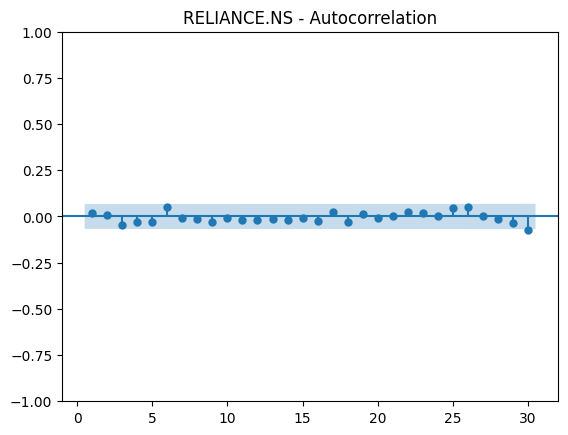

<Figure size 1200x400 with 0 Axes>

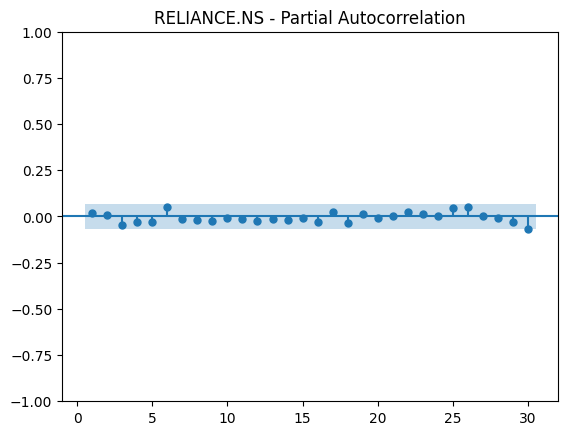

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Pick one stock for autocorrelation analysis
ticker = 'RELIANCE.NS'
reliance_df = close_prices[close_prices['Ticker'] == ticker].set_index('Date')

# Calculate returns for stationarity
reliance_returns = reliance_df['Close'].pct_change().dropna()

plt.figure(figsize=(12, 4))
plot_acf(reliance_returns, lags=30, title=f"{ticker} - Autocorrelation", zero=False)
plt.show()

plt.figure(figsize=(12, 4))
plot_pacf(reliance_returns, lags=30, title=f"{ticker} - Partial Autocorrelation", zero=False)
plt.show()


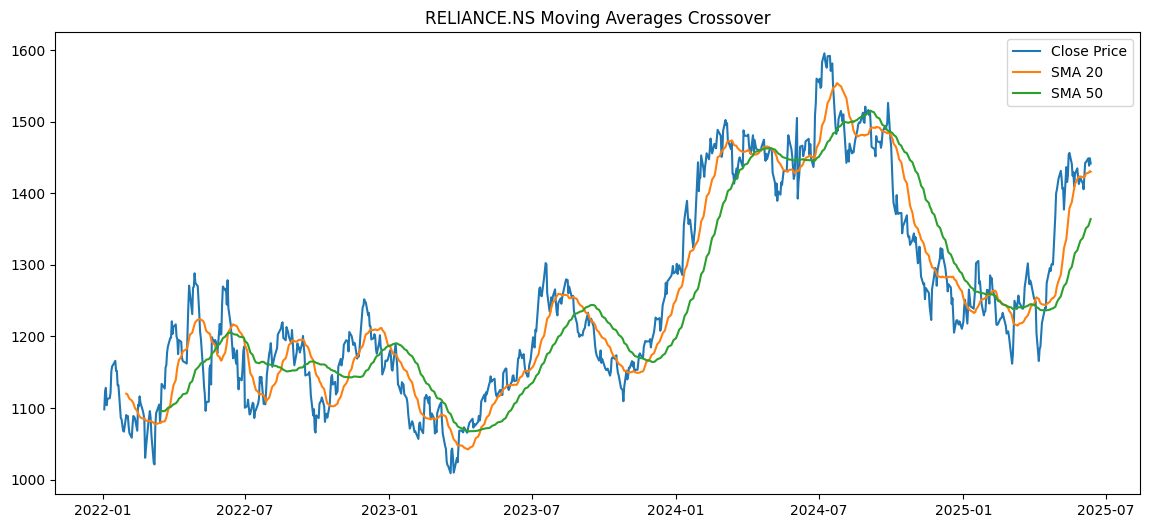

In [ ]:
def add_moving_averages(df, short=20, long=50):
    df['SMA20'] = df['Close'].rolling(window=short).mean()
    df['SMA50'] = df['Close'].rolling(window=long).mean()
    return df

# Apply on each stock
ma_df = pd.DataFrame()
for ticker in close_prices['Ticker'].unique():
    temp = close_prices[close_prices['Ticker'] == ticker].copy()
    temp = add_moving_averages(temp)
    ma_df = pd.concat([ma_df, temp])

# Plot for RELIANCE.NS
plt.figure(figsize=(14, 6))
rel_ma = ma_df[ma_df['Ticker'] == 'RELIANCE.NS']
plt.plot(rel_ma['Date'], rel_ma['Close'], label='Close Price')
plt.plot(rel_ma['Date'], rel_ma['SMA20'], label='SMA 20')
plt.plot(rel_ma['Date'], rel_ma['SMA50'], label='SMA 50')
plt.title("RELIANCE.NS Moving Averages Crossover")
plt.legend()
plt.show()


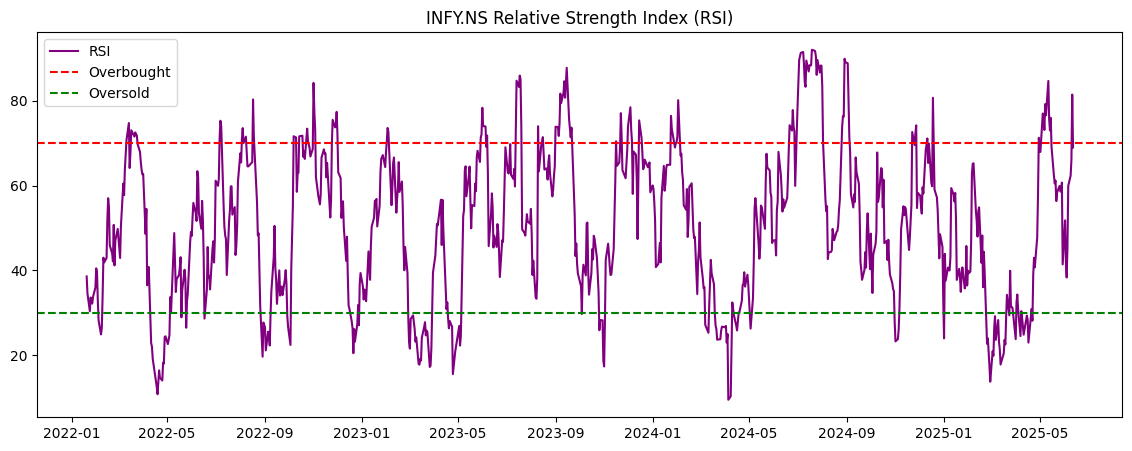

In [ ]:
def compute_rsi(series, period=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Add RSI for both stocks
rsi_df = pd.DataFrame()
for ticker in close_prices['Ticker'].unique():
    temp = close_prices[close_prices['Ticker'] == ticker].copy()
    temp['RSI'] = compute_rsi(temp['Close'])
    rsi_df = pd.concat([rsi_df, temp])

# Plot RSI for INFY.NS
infy_rsi = rsi_df[rsi_df['Ticker'] == 'INFY.NS']
plt.figure(figsize=(14, 5))
plt.plot(infy_rsi['Date'], infy_rsi['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title("INFY.NS Relative Strength Index (RSI)")
plt.legend()
plt.show()


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Use RELIANCE.NS data
df_lstm = close_prices[close_prices['Ticker'] == 'RELIANCE.NS'].copy()
df_lstm.set_index('Date', inplace=True)
df_lstm = df_lstm[['Close']].dropna()

# Normalize the close price
scaler = MinMaxScaler()
df_lstm['Close_Scaled'] = scaler.fit_transform(df_lstm[['Close']])

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

SEQ_LEN = 60
X, y = create_sequences(df_lstm['Close_Scaled'].values, SEQ_LEN)

# Reshape for LSTM input: (samples, timesteps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X.shape[1], 1)),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,985 (195.25 KB)

 Trainable params: 49,985 (195.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
SPLIT = int(0.8 * len(X))
X_train, X_test = X[:SPLIT], X[SPLIT:]
y_train, y_test = y[:SPLIT], y[SPLIT:]

history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_data=(X_test, y_test), verbose=1)


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - loss: 0.0915 - val_loss: 0.0132
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.0111 - val_loss: 0.0069
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0063 - val_loss: 0.0057
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - loss: 0.0068 - val_loss: 0.0052
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - loss: 0.0048 - val_loss: 0.0049
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0051 - val_loss: 0.0047
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - loss: 0.0052 - val_loss: 0.0045
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0049 - val_loss: 0.0045
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0049 - val_loss: 0.0043
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - loss: 0.0044 - val_loss: 0.0039
Epoch 12/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step


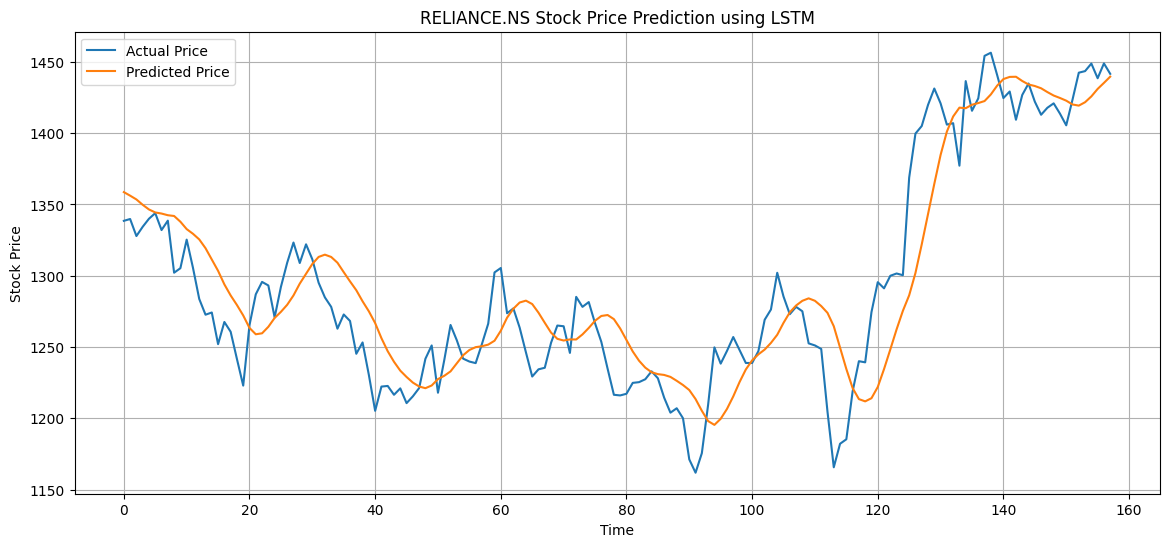

In [ ]:
# Predict on test set
predicted = model.predict(X_test)
predicted_unscaled = scaler.inverse_transform(predicted.reshape(-1, 1))
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(y_test_unscaled, label="Actual Price")
plt.plot(predicted_unscaled, label="Predicted Price")
plt.title("RELIANCE.NS Stock Price Prediction using LSTM")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

# Fine-tuned & deeper LSTM model
model_ft = Sequential([
    Bidirectional(LSTM(128, return_sequences=True), input_shape=(X.shape[1], 1)),
    Dropout(0.3),
    LSTM(64, return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dense(1)
])

model_ft.compile(optimizer='adam', loss='mse')
model_ft.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 60, 256)        │       133,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 60, 64)         │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227,745 (889.63 KB)

 Trainable params: 227,745 (889.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_ft = model_ft.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 390ms/step - loss: 0.0687 - val_loss: 0.0133
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 271ms/step - loss: 0.0075 - val_loss: 0.0053
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 271ms/step - loss: 0.0057 - val_loss: 0.0049
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 339ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 274ms/step - loss: 0.0039 - val_loss: 0.0042
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 256ms/step - loss: 0.0037 - val_loss: 0.0038
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 374ms/step - loss: 0.0035 - val_loss: 0.0040
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 310ms/step - loss: 0.0031 - val_loss: 0.0033
Epoch 9/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 282ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 10/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 302ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 11/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 300ms/step - loss: 0.0030 - val_loss: 0.0050
Epoch 12/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 311

In [ ]:
N_STEPS_AHEAD = 30  # Forecast 30 future days
last_sequence = df_lstm['Close_Scaled'].values[-SEQ_LEN:]

forecasted_scaled = []

current_seq = last_sequence.copy()

for _ in range(N_STEPS_AHEAD):
    input_seq = current_seq.reshape(1, SEQ_LEN, 1)
    next_pred = model_ft.predict(input_seq)[0][0]
    forecasted_scaled.append(next_pred)
    current_seq = np.append(current_seq[1:], next_pred)

# Inverse scale to get actual prices
forecasted_prices = scaler.inverse_transform(np.array(forecasted_scaled).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━

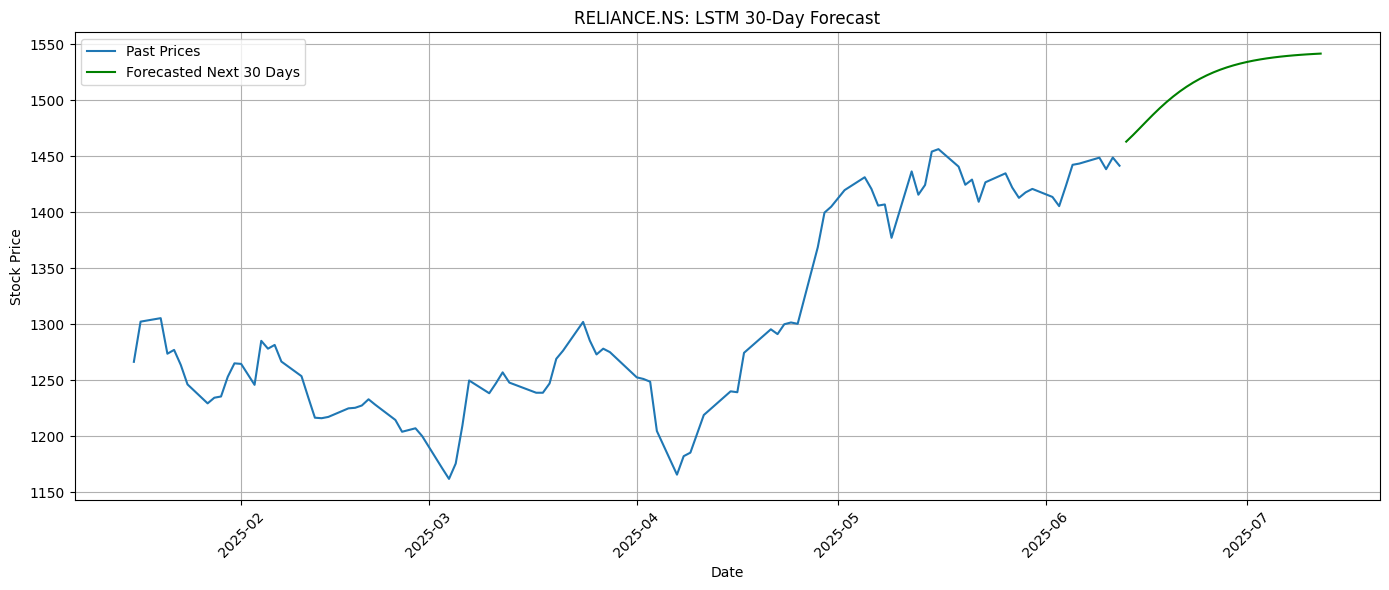

In [ ]:
# Build timeline
import datetime
last_date = df_lstm.index[-1]
forecast_dates = [last_date + datetime.timedelta(days=i) for i in range(1, N_STEPS_AHEAD + 1)]

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df_lstm.index[-100:], df_lstm['Close'].values[-100:], label="Past Prices")
plt.plot(forecast_dates, forecasted_prices, label=f"Forecasted Next {N_STEPS_AHEAD} Days", color="green")
plt.title(f"RELIANCE.NS: LSTM {N_STEPS_AHEAD}-Day Forecast")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
